<a href="https://colab.research.google.com/github/ArcherOO7/GDG-Project/blob/main/Stock_Span_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


Stock span saved to stock_span_output.csv


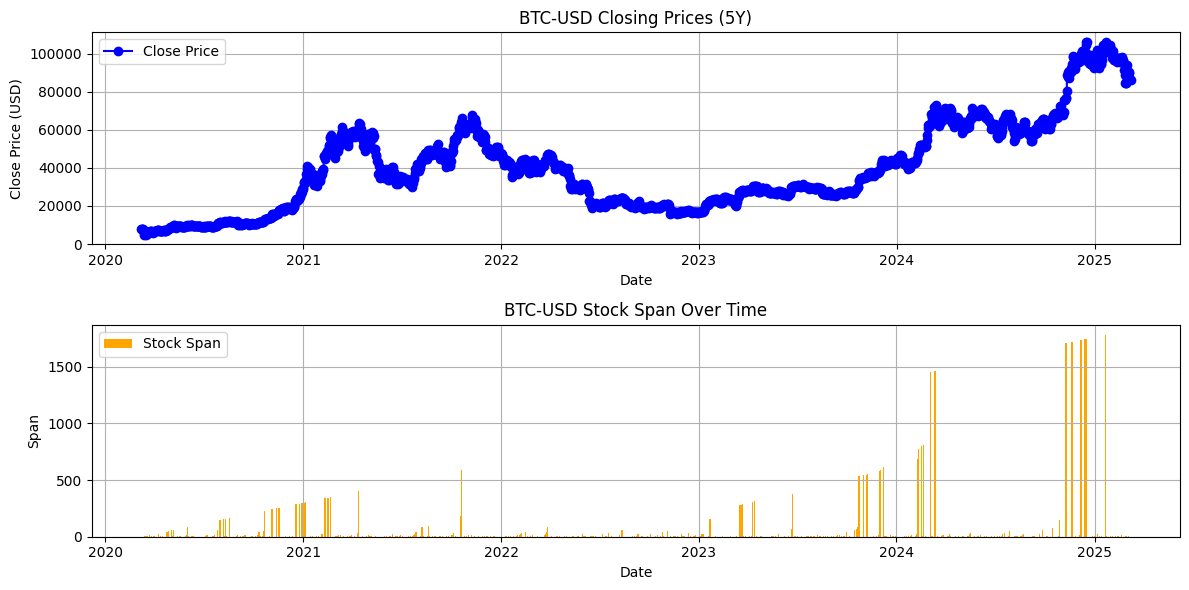

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def compute_stock_span(prices):
    """Compute stock span using a stack (O(n) time complexity)."""
    n = len(prices)
    span = [1] * n
    stack = []  # Stack stores (index, price)

    for i in range(n):
        while stack and stack[-1][1] <= prices[i]:
            stack.pop()

        span[i] = i + 1 if not stack else i - stack[-1][0]
        stack.append((i, prices[i]))

    return span

ticker = "BTC-USD"
df = yf.download(ticker, period="5y", interval="1d", auto_adjust=False)

if 'Close' not in df.columns:
    raise KeyError("Column 'Close' not found. Check if Yahoo Finance changed the data format.")

df = df[['Close']].copy()
df = df.reset_index()
df['Span'] = compute_stock_span(df['Close'].values)
output_file = "stock_span_output.csv"
df.to_csv(output_file, index=False)
print(f"Stock span saved to {output_file}")

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-', color='b', label="Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.title(f"{ticker} Closing Prices (5Y)")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.bar(df['Date'], df['Span'], color='orange', label="Stock Span")
plt.xlabel("Date")
plt.ylabel("Span")
plt.title(f"{ticker} Stock Span Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()